# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus y limpieza del corpus

In [1]:
## Antes que nada, vamos a limpiar los datos, eliminaremos elementos no informativos 
## Se transformaron los textos a minúsculas, se eliminaron signos de puntuación, números, 
## caracteres especiales y palabras vacías (stopwords)

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from sklearn.datasets import fetch_20newsgroups
import re
from nltk.corpus import stopwords

# Cargar corpus
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Crearemos la función para limpiar el texto
# Función de limpieza
stop_words = set(stopwords.words('english'))
def limpiar_texto(texto):
    palabras = re.sub(r'[^a-z\s]', ' ', texto.lower()).split()
    return ' '.join([p for p in palabras if p not in stop_words and len(p) > 2])

# Aplicar limpieza
corpus_limpio = [limpiar_texto(doc) for doc in newsgroupsdocs]

print("Documentos cargados:", len(corpus_limpio))
print("Ejemplo de documento limpio:\n", corpus_limpio[0][:300])


Documentos cargados: 18846
Ejemplo de documento limpio:
 sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually bit puzzled bit relieved however going put end non pittsburghers relief bit praise pens man killing devils worse thought jagr showed much better regular season stats also lot fun watch playoffs bowman let jag


In [4]:
## Tokenizar y crear diccionario

In [5]:
from collections import Counter

tokenizado = [doc.split() for doc in corpus_limpio]
todos_los_tokens = [token for doc in tokenizado for token in doc]
diccionario = Counter(todos_los_tokens)

print("Top 10 palabras más frecuentes:")
print(diccionario.most_common(10))


Top 10 palabras más frecuentes:
[('one', 10409), ('would', 10191), ('like', 6529), ('people', 6459), ('get', 5883), ('know', 5774), ('also', 5592), ('use', 5033), ('think', 5005), ('time', 4879)]


## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [6]:
## Construir la matriz de términos (TF)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer_tf = CountVectorizer(max_features=1000)  # puedes limitar a 1000 términos
tf_matrix = vectorizer_tf.fit_transform(corpus_limpio)

tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer_tf.get_feature_names_out())
print(" Matriz TF (primeros 5 documentos, 10 términos):")
print(tf_df.iloc[:5, :10])


 Matriz TF (primeros 5 documentos, 10 términos):
   ability  able  accept  access  according  account  across  act  action  \
0        0     0       0       0          0        0       0    0       0   
1        0     0       0       0          0        0       0    0       0   
2        0     0       0       0          0        0       0    0       0   
3        1     0       0       0          0        0       0    0       0   
4        0     0       0       0          0        0       0    0       0   

   actually  
0         1  
1         0  
2         0  
3         0  
4         0  


In [8]:
## Calcular Frecuencia de Documento (DF)
## Cada palabra tiene un DF = número de documentos donde aparece al menos una vez.

In [9]:
import numpy as np
import pandas as pd

# Calcular DF: número de documentos donde aparece cada palabra
df = np.sum(tf_matrix.toarray() > 0, axis=0)

# Convertir a DataFrame para visualizar
df_df = pd.DataFrame({
    'término': vectorizer_tf.get_feature_names_out(),
    'DF': df
}).sort_values(by='DF', ascending=False)

print(" Frecuencia de Documentos (DF) - Top 10 términos:")
print(df_df.head(10))


 Frecuencia de Documentos (DF) - Top 10 términos:
    término    DF
988   would  5269
609     one  5224
489    like  4213
460    know  3807
356     get  3642
27     also  3237
888   think  3146
634  people  2988
895    time  2951
199   could  2813


In [10]:
## Calcular TF-IDF con sklearn

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus_limpio)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print(" Matriz TF-IDF (primeros 5 documentos, 10 términos):")
print(tfidf_df.iloc[:5, :10])


 Matriz TF-IDF (primeros 5 documentos, 10 términos):
   ability  able  accept  access  according  account  across  act  action  \
0  0.00000   0.0     0.0     0.0        0.0      0.0     0.0  0.0     0.0   
1  0.00000   0.0     0.0     0.0        0.0      0.0     0.0  0.0     0.0   
2  0.00000   0.0     0.0     0.0        0.0      0.0     0.0  0.0     0.0   
3  0.09188   0.0     0.0     0.0        0.0      0.0     0.0  0.0     0.0   
4  0.00000   0.0     0.0     0.0        0.0      0.0     0.0  0.0     0.0   

   actually  
0  0.127215  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  


In [13]:
## Ver IDF de cada término

In [14]:
# Promedio del TF-IDF de cada término
promedios = tfidf_df.mean().sort_values(ascending=False)

print(" Términos más relevantes (según TF-IDF promedio):")
print(promedios.head(10))


 Términos más relevantes (según TF-IDF promedio):
would     0.032644
one       0.030004
like      0.024298
know      0.023332
get       0.022374
think     0.020281
people    0.020008
also      0.017552
use       0.017397
could     0.017336
dtype: float64


In [15]:
## 

## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [16]:
## Crear el vector TF-IDF del corpus (Reutilizarlo)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus_limpio)


In [18]:
## Ingresar una consulta de búsqueda

In [19]:
consulta = "computer graphics and images"


In [20]:
## convertimos esa consulta al mismo espacio vectorial TF-IDF

In [21]:
consulta_tfidf = vectorizer_tfidf.transform([consulta])


In [22]:
## Calcular la similitud coseno entre la consulta y todos los documentos

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Similitud coseno entre la consulta y todos los documentos
similitudes = cosine_similarity(consulta_tfidf, tfidf_matrix).flatten()


In [24]:
## Generar el ranking de documentos por relevancia

In [25]:
import pandas as pd
import numpy as np

ranking_indices = np.argsort(similitudes)[::-1]  # índices ordenados de mayor a menor similitud

# Crear tabla con los resultados
ranking_df = pd.DataFrame({
    'Documento': ranking_indices,
    'Score (Similitud)': similitudes[ranking_indices],
    'Contenido (extracto)': [corpus_limpio[i][:150] for i in ranking_indices]
})

print(" Top 10 documentos más relevantes según TF-IDF:")
print(ranking_df.head(10))


 Top 10 documentos más relevantes según TF-IDF:
   Documento  Score (Similitud)  \
0       8050           0.364614   
1       9153           0.359325   
2       3497           0.357602   
3      18248           0.350843   
4      12488           0.340086   
5      15784           0.318553   
6       7566           0.306423   
7      16571           0.297568   
8      13216           0.295646   
9      14852           0.281243   

                                Contenido (extracto)  
0  technion israel institute technology departmen...  
1  group gif images contain small images place im...  
2  working bit rgb bmp files need comvert bit ima...  
3  image moon caught weather satellite images ear...  
4  european computer research centre research pos...  
5  looking program able display bits images using...  
6  within next several months looking job compute...  
7  also interested info public domain commercial ...  
8                                  comp graphics faq  
9  yes known bre

## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [26]:
## Usar el tokenizado existente y crear el modelo BM25

In [27]:
from rank_bm25 import BM25Okapi

# Usar el tokenizado que ya tenías
tokenized_corpus = tokenizado  # Reutilizamos tu lista existente

# Crear el modelo BM25
bm25 = BM25Okapi(tokenized_corpus)
print("Modelo BM25 creado correctamente")


Modelo BM25 creado correctamente


In [28]:
## Definir la consulta

In [29]:
consulta = "computer graphics and images"
tokenized_query = consulta.lower().split()


In [30]:
## Calcular ranking

In [31]:
import pandas as pd

scores = bm25.get_scores(tokenized_query)
ranking_bm25 = pd.DataFrame({
    'Documento': range(len(scores)),
    'Score_BM25': scores
}).sort_values(by='Score_BM25', ascending=False)

print(" Top 10 documentos según BM25:")
print(ranking_bm25.head(10))


 Top 10 documentos según BM25:
       Documento  Score_BM25
9601        9601   16.158961
11363      11363   13.801214
8050        8050   13.709205
12488      12488   13.292821
15784      15784   13.272785
13298      13298   13.080847
14852      14852   13.008997
9202        9202   12.872127
17448      17448   12.803853
2562        2562   12.625330


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [32]:
## Usaremos la librería Matplotlib

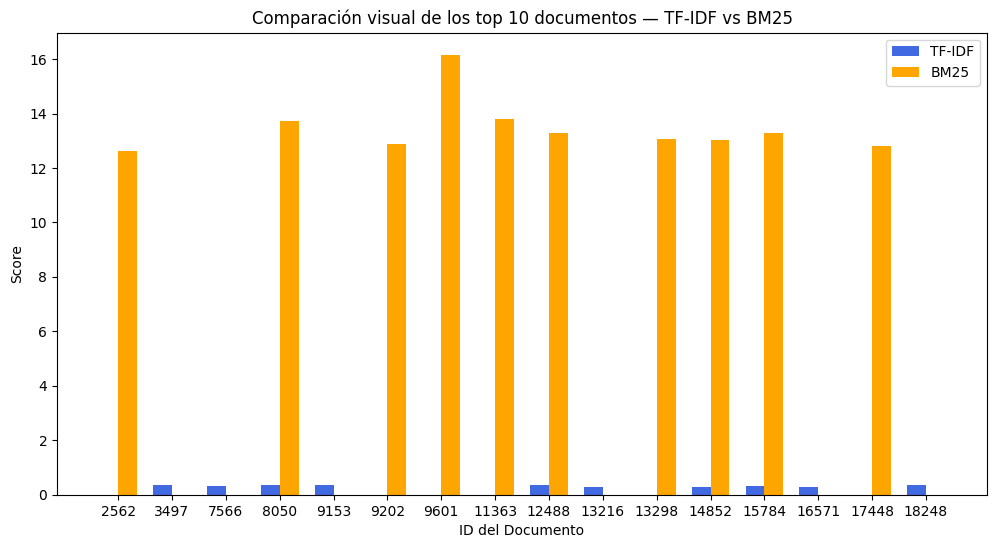

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Número de documentos más relevantes a mostrar
top_n = 10

# Seleccionamos los top documentos por TF-IDF y BM25
top_tfidf = ranking_df.head(top_n)
top_bm25 = ranking_bm25.head(top_n)

# Unimos ambos rankings por el ID del documento
comparacion = top_tfidf.merge(top_bm25, on="Documento", how="outer").fillna(0)

# Gráfico comparativo
x = np.arange(len(comparacion))  # posiciones en eje X
width = 0.35  # ancho de barras

plt.figure(figsize=(12,6))
plt.bar(x - width/2, comparacion["Score (Similitud)"], width, label="TF-IDF", color='royalblue')
plt.bar(x + width/2, comparacion["Score_BM25"], width, label="BM25", color='orange')

plt.xticks(x, comparacion["Documento"].astype(str))
plt.xlabel("ID del Documento")
plt.ylabel("Score")
plt.title(f"Comparación visual de los top {top_n} documentos — TF-IDF vs BM25")
plt.legend()
plt.show()



## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?